# Forward model

In [1]:
import numpy as np
import jax.numpy as jnp
from jax.config import config
from matplotlib import pyplot as plt
import time

from simplecryoem.utils import volume_comp, mip_z
from simplecryoem.forwardmodel import project_spatial

In [2]:
%load_ext autoreload
%autoreload 2

config.update("jax_enable_x64", True)
plt.rcParams["figure.figsize"] = 6, 6

### Create volume

Text(0.5, 1.0, 'Volume_comp MIP')

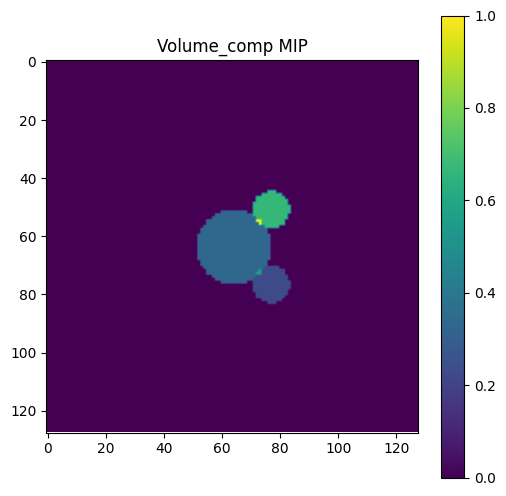

In [3]:
nx = 129
shape = np.array([128, 128, 128])
dimensions = np.array([1, 1, 1])
pixel_size = dimensions[0] / shape[0]

# A volume with components
centres = np.array([[0, 0, 0], [0.1, 0.1, 0], [0.1, -0.1, 0]])
radii = np.array([0.1, 0.05, 0.05])
intensities = np.array([10, 7, 20])

v = jnp.array(
    volume_comp(shape, dimensions, centres, radii, intensities, False, sigma=0.01)
)
mip_z(v)
# plt.imshow(v[:,:,int(np.floor(v.shape[2]/2))])
plt.colorbar()
plt.title("Volume_comp MIP")

## Project using trilinear interpolation

1.2053301334381104


Text(0.5, 1.0, 'Vol FFT slice')

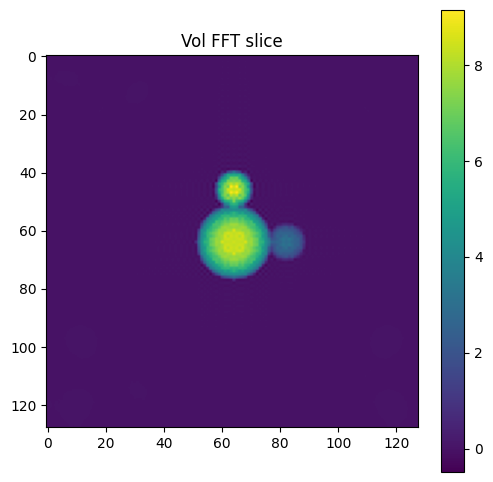

In [4]:
angles = jnp.array([0, 0, jnp.pi / 4])
# shifts = jnp.array([-20,-30])*pixel_size
shifts = jnp.array([0, 0])

start = time.time()
v_slice = project_spatial(v, angles, pixel_size, shifts, "tri", pfac=2)
print(time.time() - start)

plt.imshow(v_slice)
plt.colorbar()
plt.title("Vol FFT slice")

## Nearest neighbour interpolation

0.5846598148345947


Text(0.5, 1.0, 'NN')

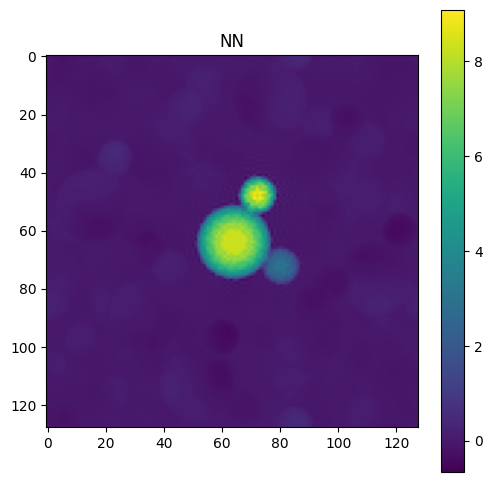

In [5]:
# angles = jnp.array([0,np.pi/2,jnp.pi/1000])
angles = jnp.array([0, 0, jnp.pi / 10])

start = time.time()
slice_nn = project_spatial(v, angles, pixel_size, shifts, "nn", pfac=2)
print(time.time() - start)


plt.imshow(slice_nn)
plt.colorbar()
plt.title("NN")

# Point source

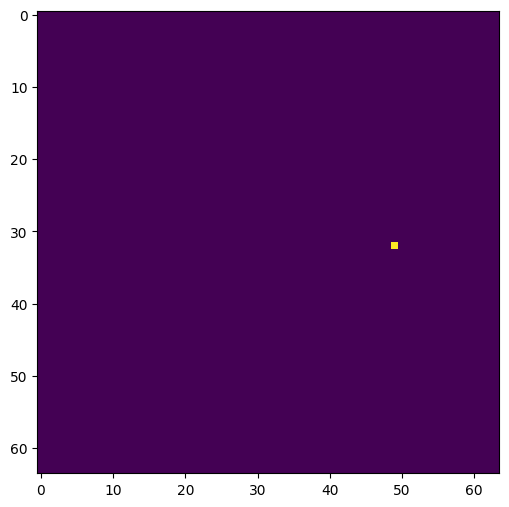

In [6]:
nx = 64
dx = 0.2

v = np.zeros([nx, nx, nx])
v[32, 49, 32] = 1

mip_z(v)

0.7340579032897949


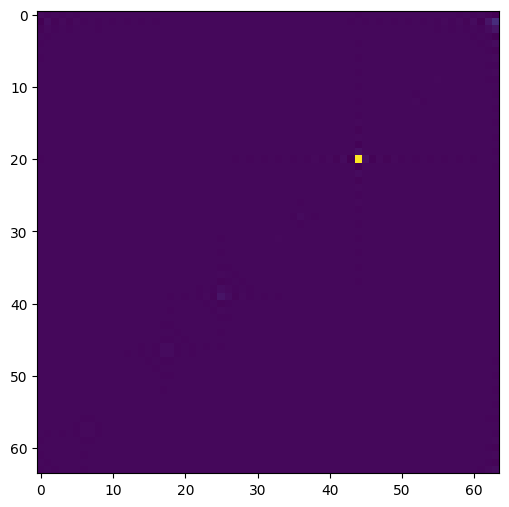

In [7]:
angles = jnp.array([0, 0, np.pi / 4])

start = time.time()
proj = project_spatial(v, angles, pixel_size, [-10, 10], "tri", pfac=1)
print(time.time() - start)

plt.imshow(proj)